# Motivation

### The dataset
The dataset that is used for this project is collected from Centraal Bureau voor de Statistiek (<b>CBS</b>; English: Central Agency for Statistics; CBS, 2019). This source provides data over a wide variety of cities in the Netherlands. However, for this project, the mere focus is on Amsterdam. The dataset that is created with the use of the CBS data contained 18 variables over 99 districts in Amsterdam, for the years 2007 up to and including 2018. The different variables can be divided into variables including demographics, property valuation and income data.

Furthermore, in order to create a geographic visualization, a GeoJSON dataset of Amsterdam is used, which was openly available on the public website of Amsterdam  (Gemeente Amsterdam, 2019).


### The decision
The decision for choosing this topic for the narrative is mainly based on the national fear of a housing bubble in Amsterdam. When the economic crisis reached its peak in 2008, the housing prices stagnated strongly. After some years, the renewed confidence in the economy and the low-interest rates drove home buyers to increasingly buy houses above the asking price, in the expectation that house prices will continue to rise. Besides this phenomenon, the supply of available houses has decreased, continuing to drive up the prices even more.  These developments have made housing in Amsterdam unavailable for lower and middle class incomes and thus has effects on the socio-demographic characteristics of the city (Spiegelaar & Vrieselaar, 2019). In order to investigate the spatial development of this gentrification, property valuation data of districts in Amsterdam is combined with social demographic data.

### The experience
Since the housing market is quite a complex topic, the goal for the user experience was to give a clear overview of the development, without the need of any prior knowledge. In order to do so, the Drill-Down Story structure is applied (Segel & Heer, 2010). This structure is described by firstly presenting a general there and then allowing the user to choose among instances to reveal additional details and backstories. 


# Basic stats

### The preprocessing
The datasets found on the CBS website included 110 variables of all the major cities in the Netherlands. However, the dataset was separate for every year. Therefore, the first step was to filter out the city of Amsterdam, and merge all the separate datasets to one dataset including the data over the selected years.

During this process, the variables were found to differ for the separate years. Therefore, during the processes of creating one dataset, the decision was made to select some major variables which proved to be interesting and which were shared over all the years. 

The preprocessing resulted in a highly reduced dataset of 113 KB, 1375 rows and 18 variables.


### The statistics
In order to familiarize ourselves with the dataset, some basic statistics were investigated. Below, the statistics and visualizations are given and explained.

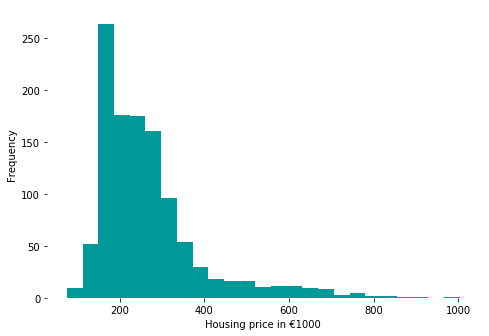

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

amsterdam_data = pd.read_csv("../Final_datafiles/Data_ultimate_corrected.csv",na_values = ['.'], delimiter=",")
ax = plt.axes([0,0,1,1], frameon=False)

plt.hist(amsterdam_data.WOZ.dropna(), bins= 25, color= '#009999') 
plt.ylabel("Frequency")
plt.xlabel('Housing price in €1000')
plt.show()

As can be seen in the histogram displayed above, the housing prices over all the years are positively skewed

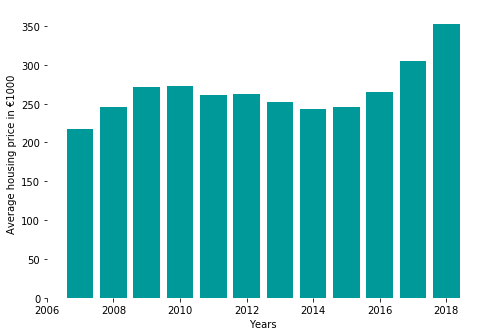

In [4]:
grouped = amsterdam_data.WOZ.groupby([amsterdam_data.Year]).mean()
ax = plt.axes([0,0,1,1], frameon=False)
plt.bar(grouped.index, grouped, color= '#009999')  # arguments are passed to np.histogram
plt.ylabel('Average housing price in €1000')
plt.xlabel('Years')
plt.show()

The plot above displays that the housing prices have changed quite dramatically over the past years. Interesting is that the housing prices only dropped some years after the peak of the crisis. Moreover, a vast increase in house prices can be seen in the last couple of years. 

Figure(432x288)


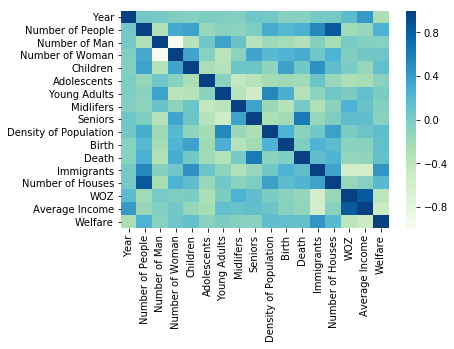

In [6]:
import seaborn as sns

corr_matrix = amsterdam_data.corr()
sns_plot = sns.heatmap(corr_matrix, cmap="GnBu")
fig = sns_plot.get_figure()
print(fig)


The correlation heatmap displayed above shows quite some interesting correlations. One can see that the housing price ('WOZ'), displays a wide variety of correlations with different variables, which can form interesting insights

# Data Analysis

####  The preprocessing
Before the data analysis is more thoroughly discussed, it seems appropriate to discuss the learning for the data preprocessing, as this is a major step in the data analysis and moreover, this step gave some important insights. The process of preprocessing was mainly marked by the fact that all the years were divided over separate datasets. In the process of combining these, several problems were encountered. First, the different districts changed over the years. Since we did not foresee this problem and also did not quite grasp the importance of this issue, no clear plan of action was made. This resulted in the fact that while making the visualization, we constantly encountered yet another district which contained issues.

While merging the datasets, another problem which was encountered was the fact that not all years had the same attributes or even used the same names for the same attributes. Therefore, it had to be checked manually whether the attributes indeed represented the same data. Again, from the beginning on, the extent of the issues was not quite understood by us, leaving us with little communication and guidelines. As a result, the creation of the visualization was not quite smoothly and the visualizations kept displayed corrupted data entrances. This again forced us to revive the dataset quite often.

Although in hindsight this can only be labelled as naïve, it learned us how important it is to pay proper attention to the process of preparing the dataset. Investing extra time here results in saving time later in the process. Concrete step for the future would be to document both the encountered issues and the decisions concerning the solution more thorougly.

####  The analysis 

Firstly, by creating a choropleth, the user is able to understand how the different geographies influence the housing prices. Different from expected, this displayed that the areas in the city centre were not necessarily the most valuable. Other, more historical areas and areas that are close to the city centre yet have an extremely green environment proved to be more valuable than merely a positive location. Furthermore, the plot which displays the yearly development for all the districts shows quite clearly that not all districts are affected the same by the trend of increasing housing prices. The steepest decrease and increase is displayed by the districts that averagely quite high in price. 

Furthermore, several variables can be plotted against the housing prices, which will also display the correlation between the two attributes. Interestingly, the correlation between seniors and housing prices over the years is quite strong for the districts which have more pricy houses, indicating a common increase. On the contrast, a strong negative relationship can be seen when investigating the correlation between housing prices and young adults, indicating that the increase in prices for a district, drives away the younger inhabitants. Another interesting insight can be gained from investigating the number of people receiving welfare and the different districts. One can see that over the years, almost all areas housed fewer people receiving welfare. When investigating more thoroughly, the city of Amsterdam has indeed decided to upgrade some of the districts, relocating the social houses outside the city. 

To conclude, the visualization displays a change in spatial development, creating a city centre with the older, more wealthy inhabitant, driving the middle class towards the areas with less expensive houses and driving the lower class outside the city.


# Genre

It is difficult to put our genre into one category and can, therefore, best be described as a combination of two genres. One could say it is an annotated chart/map with flow chart tactics. As in our case charts are used to visualize the data and you can use one chart to select data for the other charts(one chart guides you to the next chart), this can be seen as flow chart tactics. 

#### Visual Narrative
For visual structuring, a consistent visual platform has been implemented. An establishing shot is not used for the narrative as a whole but is implement in the map to give a good overview of the different districts which concerns the data. The progress bar and checklist progress tracker have not been implemented as the narrative is not unidirectional but meant to go back and forth. 

For highlighting feature distinction is applied by using different colour and hovers to identify the features. Motion is also applied when selecting a different feature or districts, the lines within the graphs move to make them more identifiable. Zooming is also applied for the map of Amsterdam in which the districts can be selected. Due to the limited amount of data points for each district close-ups within the graphs seemed not suited for the graphs.
 
Regarding the transition guidance, several aspects have been applied to make the guidance more clearly. Animated transitions within the graphs have been applied to make the transitions more attractive and clear. Object continuity has been applied as well as in either the map, the multiline chart and the double axis chart, the property valuation comes back. This keeps it easy for the user to follow what the charts are about and to actually get an insight into this feature. At first this variable is plotted geographically, later in a line chart to better compare and in the last chart against other variables per selected district. Familiar objects are also applied while for all the charts the user experiences familiar aspects, similar hovers and style.


#### Narrative Structure
The ordering can be described as a combination between a linear ordering (as the user goes from above to below) and a user directed path(as the user is able to go back and forth to select different variables and districts and decide what he wants to inspect.

Interactivity plays an important role in the narrative as this seems the best way to get the user involved. Hovering is applied in all graphs to attract the user to inspect the charts more carefully. Filtering is based both on the map where you can geographically filter on different districts, making the filtering visually attractive. Below also a more classical filtering approach is applied with a dropdown menu so the user is able to filter within its current selection of districts one district which he wants to further inspect. Explicit instructions are implemented for the aspects which are not self-explanatory, namely that you have to hold shift to select more than one district on the map. For more evident aspects the explicit instructions were not given as we expect the user to explore a bit by him/herself. The default views have been made stimulating for the map as one looks at the whole city of Amsterdam and immediately has a view on all district which he/she can inspect.

Within the messaging is attained to not use too much text but rather make the data as visual as possible. An introductory text is implemented to give the user an idea about what he or she can inspect and why it is relevant. Captions and headlines are applied to make the narrative more readable. Also a short introduction text is used to get the user to know the background of the data and explain the relevance.  


# Visualisations

### The visualisations
Firstly, to give the user more insight into the value of the houses located in different areas, a choropleth is displayed. The user can find in the legend what the different colours mean for the value of the houses. Moreover, this map is interactive: when hovering over the different district, the user is able to see the names. By clicking on a district, the user is able to inspect the development over the years in the plot displayed below. Lastly, by clicking holding ´shift´ while clicking, the user is able to select multiple districts.

Below the choropleth, the user can see a line graph which shows the value of the housing prices of all the districts over the years. When selecting a district, the line is highlighted. When selecting more than one district, multiple districts will be highlighted. By hovering over the different selected areas, the name of the district will be displayed.

Lastly, to gain insight in which other circumstance which might be correlated with the housing prices, besides the location, the user is able to select an extra variable in a drop-down menu. Once the user does this, an extra line graph will be displayed, plotting the value of the house against the chosen variable, again over the course of several years. This plot will also display the correlation between the two variables.


### The rational
Again, the goals of the narrative were to give the user insight into the development of the housing market. Because the developments are quite complex, the need for a Drill-Down Story was clear (Segel & Heer, 2010). This reader-driven approach lets the user dictate which stories are told and when. The use of spatial data was both inevitable and gave the perfect opportunity to introduce the general theme. Moreover, the importance and effectiveness of geographic data are demonstrated through numerous work (for an overview, see: Laudares, Laudares & Libório, 2016). Therefore, the choropleth seemed highly appropriate to introduce the user to the dataset. 

Nevertheless, the most interesting aspect of the housing market is the fact that it is highly dynamic throughout the course of years. Therefore, it seemed necessary to give the user more insight into the development of housing prices over the years. Also, it seemed necessary to us that the other districts would also be visible to the user at all times, to give the user a sense of overview while inspecting the plots.

Lastly, the gain insight is the socio-demographic characteristics of the city, it seemed important to let the user investigate which other variables were related to the value of a house. Therefore, the user is able to see different variables plotted in the same graph. By making two y-axes, the user is able to directly investigate the development over the years. Lastly, for the user who wishes to be more mathematically informed, the correlation between the two variables is given.



# Discussion

### The tops
One of the major things we strived for, was to make a complete narrative, which would be understandable for every type of user and gave sufficient freedom to the user to inspect the narrative at their own pace. Overall, by applying the Drill-Down Story approach (Segel & Heer, 2010), we believe that this goal is met. Furthermore, by giving both statistical numbers and visualization, several types of users can be interested.


### The flops
Because of the fact that we strived for a complete story for everyone, this automatically resulted in the decision to not involve highly complex visualizations. One could nevertheless argue that the narrative as is might stay too superficial, and does not necessarily give the more informed user a challenge. 

Overall, the narrative is quite strongly linked to development over the years. For future steps, it would be interesting to link several news media to the development. Although the visualization gives an overview of the development, no further rationale is given in the narrative as it is right now. By including, for example, a word cloud containing the newspaper headlines, which dynamically changes over the years, it would be possible to not only provide an overview, but also an explanation for the developments.


# Contribution

|Person | Contribution  |
|:--|:------|
|   Bram | Preliminary analysis video |
|   Bram | Explaining genre in video |
|   Bram | Voice over video |
|   Bram | Data cleaning and preprocessing |
|   Bram | Write Basic Statistics |
|   Bram | Write Data Analysis |
|   Bram | Write Discussion |
|   Bram | Create Multiple Line Plot |
|   Bram | Create Double Axis Plot |
|   Bram | Create Correlation calculation |
|   Ylja | Mock-up visualisation video |
|   Ylja | Editing video |
|   Ylja | Voice over video |
|   Ylja | Data cleaning and preprocessing |
|   Ylja | Write Motivation |
|   Ylja | Write Basic Statistics |
|   Ylja | Write Data Analysis |
|   Ylja | Write Visualisations |
|   Ylja | Write Discussion |
|   Ylja | Create interactive Choropleth  |
|   Ylja | Create Correlation calculation |



In [1]:
%%html
<style>
table {float:left}
</style>

# References

Gemeente Amsterdam (2019) Dataportaal. Retrieved from data.amsterdam.nl.

Laudares, S., Laudares, J. B., & Libório, M. P. (2016). Geographic Information Systems Used as a Practical Way of Teaching Mathematics. Journal of Geographic Information System, 8(05), 608.

Segel, E., & Heer, J. (2010). Narrative visualization: Telling stories with data. IEEE transactions on visualization and computer graphics, 16(6), 1139-1148.

Spiegelaar, L. & Vrieselaar, N. (2019) House prices expected to keep rising this year, homeownership unattainable for more and more people. Dutch Housing Market Quarterly Coöperatieve Rabobank U.A., Nederland. Retrieved from https://economics.rabobank.com/publications/2019/february/dutch-housing-market-quarterly/

CBS (2019) Wijken en Buurtenstatistieken. Retrieved from https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/wijk-en-buurtstatistieken
